In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

#import geocat.datafiles as gdf
import geocat.viz as gv
import paleoscripts as ps

In [2]:
file = "/home/alhafisu/nobackup/hos03/5001-5100/stsc_hos03.nc.gz"
ds = xr.open_dataset(file)
tscmean1 = ds.tsc.mean(['year','month'], keep_attrs=True)

In [3]:
ds.tsc

<xarray.DataArray 'tsc' (year: 100, month: 12, latitude: 56, longitude: 64)>
array([[[[245.7945 , ..., 246.3904 ],
         ...,
         [243.70633, ..., 243.82234]],

        ...,

        [[236.27788, ..., 236.68947],
         ...,
         [246.39143, ..., 246.70259]]],


       ...,


       [[[239.8706 , ..., 240.46669],
         ...,
         [240.34674, ..., 240.51509]],

        ...,

        [[240.73204, ..., 241.22551],
         ...,
         [238.50853, ..., 238.53275]]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -87.56 -84.4 -81.22 ... 81.22 84.4 87.56
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * year       (year) int32 5001 5002 5003 5004 5005 ... 5097 5098 5099 5100
Attributes:
    long_name:  screen temperature
    units:      K

In [4]:
# extend the data by applying cyclic padding
tscx = ps.apply_cyclic_padding(ds.tsc)

In [5]:
tscx

<xarray.DataArray 'tsc' (year: 100, month: 12, latitude: 56, longitude: 65)>
array([[[[245.7945 , 245.21114, 244.6338 , ..., 246.9674 , 246.3904 ,
          245.7945 ],
         [248.16313, 246.31065, 244.48715, ..., 251.70024, 249.98741,
          248.16313],
         [249.42871, 246.36588, 243.42952, ..., 255.71336, 252.53323,
          249.42871],
         ...,
         [253.01488, 253.76317, 253.60593, ..., 249.43367, 251.39322,
          253.01488],
         [248.3186 , 248.21248, 247.7932 , ..., 247.48651, 248.20769,
          248.3186 ],
         [243.70633, 243.55727, 243.3676 , ..., 243.88142, 243.82234,
          243.70633]],

        [[227.96222, 227.51186, 227.0858 , ..., 228.86572, 228.42654,
          227.96222],
         [230.18674, 228.54562, 227.00536, ..., 234.01318, 232.10301,
          230.18674],
         [234.96646, 230.9275 , 227.07173, ..., 242.43628, 238.96294,
          234.96646],
...
         [257.3125 , 258.38327, 259.41562, ..., 251.80325, 255.1085 ,
          257.3125 ],
         [252.71307, 253.17834, 253.51141, ..., 248.49342, 250.27509,
          252.71307],
         [248.03203, 248.35194, 248.34927, ..., 248.03134, 248.10957,
          248.03203]],

        [[240.73204, 240.22997, 239.71616, ..., 241.69159, 241.22551,
          240.73204],
         [244.03328, 242.35576, 240.68863, ..., 247.20819, 245.65613,
          244.03328],
         [245.29143, 242.72168, 240.26776, ..., 250.7807 , 247.9864 ,
          245.29143],
         ...,
         [242.67976, 244.14325, 244.5503 , ..., 238.6857 , 239.68996,
          242.67976],
         [240.88455, 241.31755, 241.61876, ..., 239.5026 , 240.01305,
          240.88455],
         [238.50853, 238.48378, 238.50003, ..., 238.55678, 238.53275,
          238.50853]]]], dtype=float32)
Coordinates:
  * year       (year) int32 5001 5002 5003 5004 5005 ... 5097 5098 5099 5100
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * latitude   (latitude) float32 -87.56 -84.4 -81.22 ... 81.22 84.4 87.56
  * longitude  (longitude) float64 0.0 5.625 11.25 16.88 ... 348.8 354.4 360.0
Attributes:
    long_name:  screen temperature
    units:      K

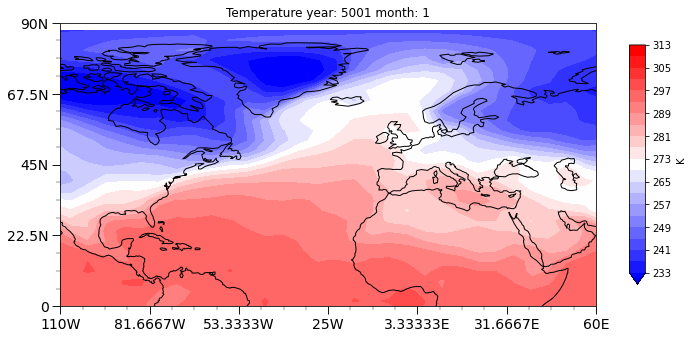

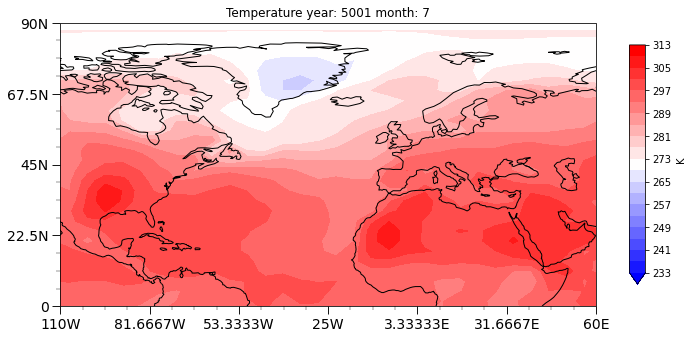

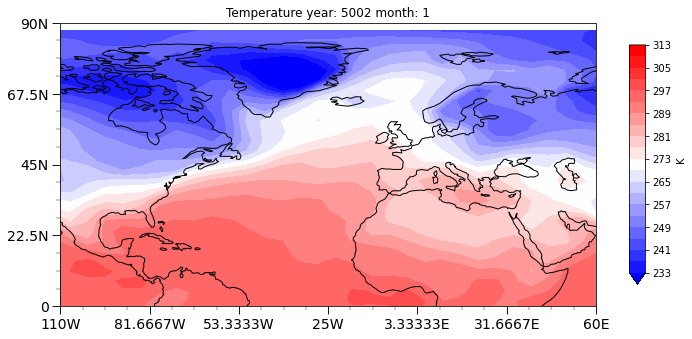

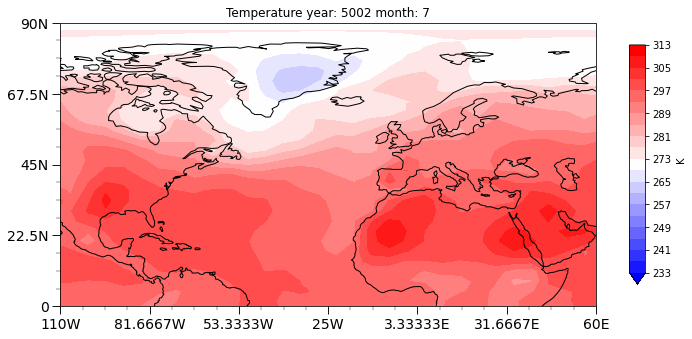

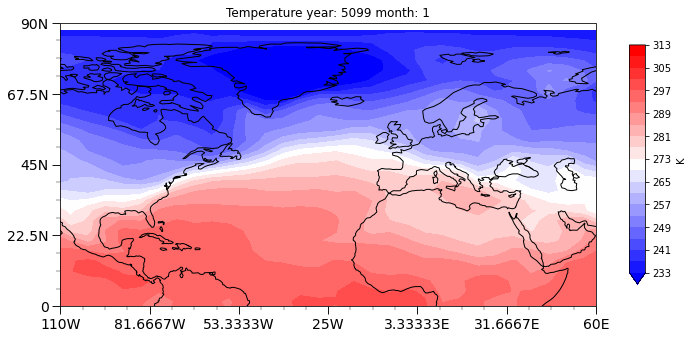

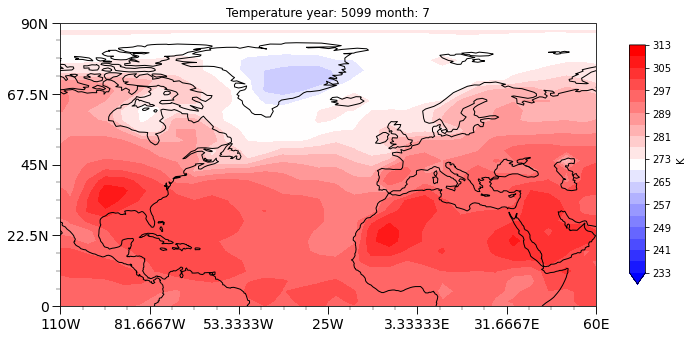

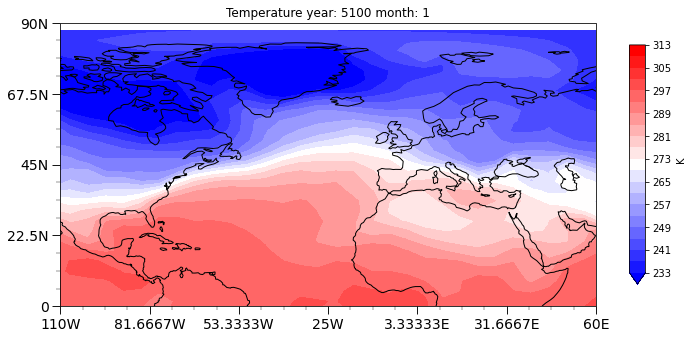

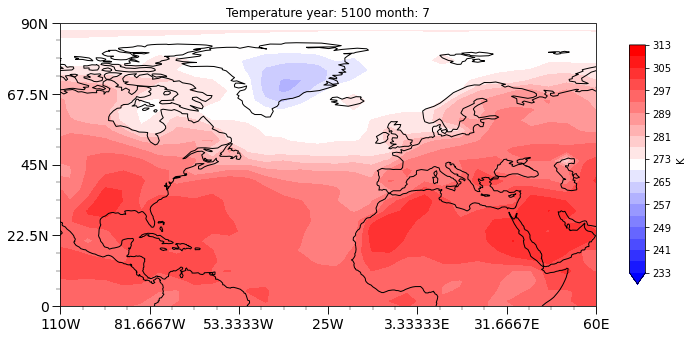

In [7]:
for y in (5001, 5002, 5099, 5100):
    for m in (1, 7):
        data = tscx.sel(year=y, month=m)
        ps.create_contourf_plot(data, central_longitude=0., 
                        title=f'Temperature year: {y} month: {m}',
                        levels=np.linspace(273.-40, 273.+40, 21), xlim=(-110,60),ylim=(0,90))